In [38]:
# Import Necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'  # Set font
%reload_ext watermark
print('*'*52)
%watermark -a "Boussiala Mohamed Nachid" -e  "boussiala.nachid@univ-alger3.dz"
print('*'*52)

****************************************************
Author: Boussiala Mohamed Nachid

Email: boussiala.nachid@univ-alger3.dz

****************************************************


In [6]:
# Set seed for reproducibility
np.random.seed(123)

# Generate random data
data1 = np.random.normal(size=1000)
data2 = np.random.normal(size=1000)

In [8]:
# Define quantile edges (0%, 25%, 50%, 75%, 100%)
quantiles1 = np.quantile(data1, [0, 0.25, 0.5, 0.75, 1])
quantiles2 = np.quantile(data2, [0, 0.25, 0.5, 0.75, 1])

In [9]:
# Initialize 4x4 correlation matrix
corr_matrix = np.full((4, 4), np.nan)

# Compute cross-quantile correlations
for i in range(4):
    for j in range(4):
        # Boolean masks for each quantile bin
        idx1 = (data1 >= quantiles1[i]) & (data1 < quantiles1[i + 1])
        idx2 = (data2 >= quantiles2[j]) & (data2 < quantiles2[j + 1])
        common_idx = idx1 & idx2
        
        # Calculate correlation if enough data in bin
        if np.sum(common_idx) > 1:
            corr_matrix[i, j] = np.corrcoef(data1[common_idx], data2[common_idx])[0, 1]

In [10]:
# Convert to DataFrame
quantile_labels = ['Q1', 'Q2', 'Q3', 'Q4']
df_corr = pd.DataFrame(corr_matrix, index=quantile_labels, columns=quantile_labels)
df_corr

,Q1,Q2,Q3,Q4
Q1,0.052810,0.110308,0.003544,0.120277
Q2,0.064233,-0.196167,0.082463,-0.119442
Q3,0.213378,-0.046186,-0.112726,-0.051883
Q4,0.117277,0.015996,-0.043259,0.271852


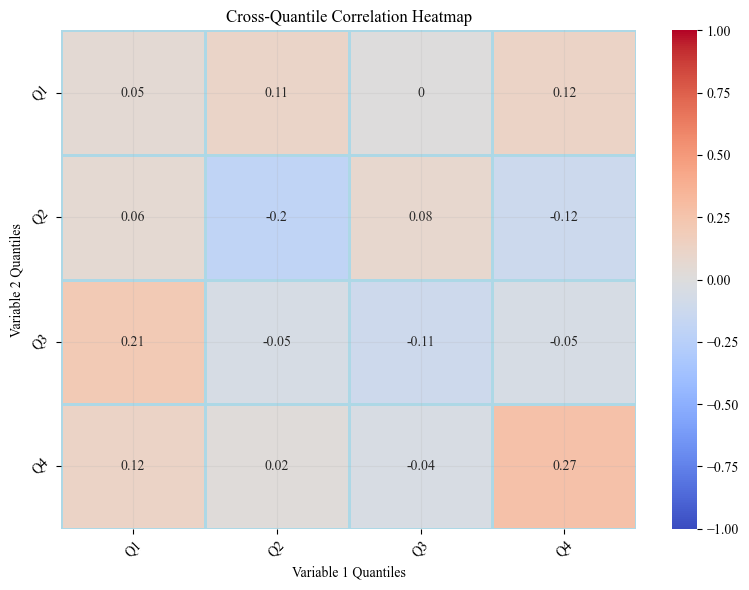

In [39]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(round(df_corr,2), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linecolor='lightblue',linewidths=2,
            xticklabels=quantile_labels, yticklabels=quantile_labels)
plt.title("Cross-Quantile Correlation Heatmap")
plt.xlabel("Variable 1 Quantiles")
plt.ylabel("Variable 2 Quantiles")
plt.xticks(rotation= 45)
plt.yticks(rotation= 45)
plt.grid(alpha= 0.2)
plt.tight_layout()
plt.show()